# Load the boston data

In [1]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()#Loading the datasets

In [3]:
# Feature matrix in X
x = boston_data.data

In [4]:
# Response matrix in Y
y = boston_data.target

# Training and Testing data

In [5]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=2) # 80% training

# Scaling 

In [6]:
#Standardize features by removing the mean and scaling to unit variance
import numpy as np
from sklearn.preprocessing import StandardScaler
e =StandardScaler()
X_train = e.fit_transform(X_train)
X_test = e.transform(X_test)

# Hyperparameter Optimization

In [7]:
from sklearn.ensemble import RandomForestRegressor

reg=RandomForestRegressor(random_state=2)

In [8]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [9]:
# Creating a dictionary with the parameters
import numpy as np
hyper_para_selection ={
    'max_depth':[2,3,4,5,6,7],
    'max_features':['auto','sqrt','log2'],
}

In [10]:
import time
begin=time.time()
reg_CV = GridSearchCV(reg, cv=10,param_grid=hyper_para_selection, n_jobs=3)
reg_CV.fit(X_train, y_train)
end=time.time()
print('Time taken in grid search: {0: .2f}'.format(end - begin))

Time taken in grid search:  5.65


# Best parameters as selected using GridSearch

In [11]:
print(reg_CV.best_params_)

{'max_depth': 6, 'max_features': 'auto'}


# Search for the best n_estimators

In [12]:
import matplotlib.pyplot as plt
estimators = np.arange(10, 700, 10)
scores = []
for n in estimators:
    reg.set_params(max_depth= 6, max_features= 'auto',n_estimators=n,oob_score=True)
    reg.fit(X_train, y_train)
    scores.append(reg.oob_score_)
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

# Hyperparameters : n_estimators

In [13]:
n_e=estimators[scores.index(max(scores))]
print(n_e)

610


# Setting the hyperparameters

In [14]:
reg=RandomForestRegressor(random_state=2,max_depth= 6, max_features= 'auto',n_estimators=n_e)

In [15]:
reg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=610, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

# Cross-validation score

In [16]:
cv_scores = cross_val_score(reg,
                     X_train,
                     y_train,
                     cv = 10,scoring='r2')

In [17]:
print(cv_scores)
print(cv_scores.mean())

[0.88402589 0.9238626  0.82784579 0.89822544 0.90089519 0.71931648
 0.83163952 0.85501286 0.8947386  0.86162789]
0.8597190245718659


# Predictions on the test data

In [18]:
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=610, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [19]:
predicted=reg.predict(X_test)

In [20]:
from sklearn.metrics import r2_score 
r2_score(predicted, y_test)

0.8640043083532234

# Selection of n_estimators against r^2 score instead of oob_score

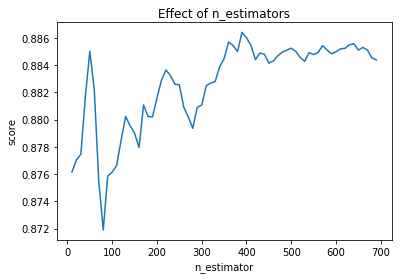

In [21]:
reg=RandomForestRegressor(random_state=2)
import matplotlib.pyplot as plt
estimators = np.arange(10, 700, 10)
scores = []
for n in estimators:
    reg.set_params(max_depth= 6, max_features= 'auto',n_estimators=n)
    reg.fit(X_train, y_train)
    scores.append(reg.score(X_test, y_test))

plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [22]:
n_e=estimators[scores.index(max(scores))]
print(n_e)#maximum no. of trees which gives the best R^2 score

390


In [26]:
reg=RandomForestRegressor(random_state=2,max_depth= 6, max_features= 'auto',n_estimators=n_e)

In [27]:
reg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=390, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [28]:
reg.fit(X_train, y_train)
predicted=reg.predict(X_test)
r2_score(predicted, y_test)

0.8654645829466436

The performance of the RF Regressor with the default settings,with the exceptance of n_estimators, gave better r^2 score than the one with hyperparameter search through GridSearchCV.
So, the final, saved model was based on the one with the default settings. The code for that is in the notebook named 'RandomForest-AAzad'